In [3]:
#set parent directory as package
import sys
sys.path.append("..")
from data_tools.tools import read_experiment_dic_results, merge_temporary_files, load_feather_folder_as_pd, write_dic_results
from models.concentration_bounds import A_expressibility
import matplotlib
import h5py
import os
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score

from models.geometric_diference_tools import geometric_difference

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


from matplotlib import rc
rc('text', usetex=True)


sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3, 'lines.markersize': 6})


In [ ]:
#First, run from the WinterKernel root folder:
#py -3 -m plotting.create_gramm_comparison_file_best_performance_direct_values
#then use notebook to plot


df = pd.read_pickle("../data/results/df_global_to_compare_gramm_matrices.pkl")

In [5]:
#df_simplified = df[["bandwidth", "dataset_name", "quantum_kernel_name", "classical_kernel_name", "optimal c", "C_quantum", "num_qubits", "seed", "Frobenius Difference", "g_gen_train", "K_max_eig_quantum", "roc_auc_score_poly", "roc_auc_score_quantum" ]]
df_simplified = df[["bandwidth", "dataset_name", "quantum_kernel_name", "classical_kernel_name", "optimal c",  "num_qubits", "seed", "Frobenius Difference", "g_gen_train", ]]


In [6]:
frobenius_str = r"$F(\mathbf{K}_{\mathrm{C}}, \mathbf{K}_{\mathrm{Q}})$"
g_str = r"$g(\mathbf{K}_{\mathrm{C}}, \mathbf{K}_{\mathrm{Q}})$"


label_dictionary={"fro": r"$ F(K_1, K_2)$",  
                  "Frobenius Difference": frobenius_str,
                  "r": r"$ R(K_1, K_2) = \sum_{i,j} \frac{(K_1 - K_2)^2_{i,j}}{(K_2^2)_{i,j}}$",
                  "nmse": r"$ NMSE(K_1, K_2) =  \frac{\sum_{i,j} (K_1 - K_2)^2_{i,j}}{\sum_{i,j} (K_2^{2})_{i,j}}$",
                "m_schuld": r"$ MS(K_1, K_2) = \sum_{i,j} (K_1 - K_2)^2_{i,j}/n^2$;" + "\n" + r"$n$ = number of entries; Ks are normalized",
                "fro_norm": r"$ F(K_1, K_2)$",
                "fro_sym": r"$ F(K_1, K_2) = \sqrt{ \sum_{i,j} (K_1 - K_2)^2_{i,j}}/\sqrt{\sum_{i,j} (K_1 \cdot K_2)_{i,j} }$",
                "norm": r"$ F(K_1, K_2) = \sqrt{\sum_{i,j} (K_2)_{i,j} }$",
                "fro_nonorm": r"$ F(K_1, K_2) = \sqrt{ \sum_{i,j} (K_1 - K_2)^2_{i,j}}$",
                "geo": "$g(K_1, K_2)$",
                "g_gen_train": g_str,

}



In [7]:
df_simplified_mean_grouped = df_simplified.groupby(["dataset_name", "quantum_kernel_name", "classical_kernel_name", "num_qubits", "optimal c"]).mean().reset_index() 
df_simplified_median_grouped = df_simplified.groupby(["dataset_name", "quantum_kernel_name", "classical_kernel_name", "num_qubits", "optimal c"]).median().reset_index() 


In [8]:
df_simplified_median_grouped["quantum_kernel_name"].unique()

array(['HZY_CZ_FQK', 'HZY_CZ_PQK', 'IQP_FQK', 'IQP_PQK', 'Sep_rx_FQK',
       'Sep_rx_PQK', 'YZ_CX_FQK', 'YZ_CX_PQK', 'Z_Embedding_FQK',
       'Z_Embedding_PQK'], dtype=object)

In [9]:
df_simplified_median_grouped["dataset_name"].unique()

array(['kMNIST28', 'pennylane_hidden-manifold', 'plasticc'], dtype=object)

plasticc
dataset: plasticc, num_qubits: 2, optimal_c: True
classical: rbf_poly_1, quantum: IQP_FQK
classical: rbf_poly_1, quantum: HZY_CZ_FQK
classical: rbf_poly_1, quantum: Z_Embedding_FQK
classical: rbf_poly_1, quantum: YZ_CX_FQK
classical: rbf_poly_1, quantum: Sep_rx_FQK
classical: rbf_poly_1, quantum: IQP_PQK
classical: rbf_poly_1, quantum: HZY_CZ_PQK
classical: rbf_poly_1, quantum: Z_Embedding_PQK
classical: rbf_poly_1, quantum: YZ_CX_PQK
classical: rbf_poly_1, quantum: Sep_rx_PQK
classical: rbf_poly_2, quantum: IQP_FQK
classical: rbf_poly_2, quantum: HZY_CZ_FQK
classical: rbf_poly_2, quantum: Z_Embedding_FQK
classical: rbf_poly_2, quantum: YZ_CX_FQK
classical: rbf_poly_2, quantum: Sep_rx_FQK
classical: rbf_poly_2, quantum: IQP_PQK
classical: rbf_poly_2, quantum: HZY_CZ_PQK
classical: rbf_poly_2, quantum: Z_Embedding_PQK
classical: rbf_poly_2, quantum: YZ_CX_PQK
classical: rbf_poly_2, quantum: Sep_rx_PQK
classical: rbf_poly_3, quantum: IQP_FQK
classical: rbf_poly_3, quantum: HZY_C

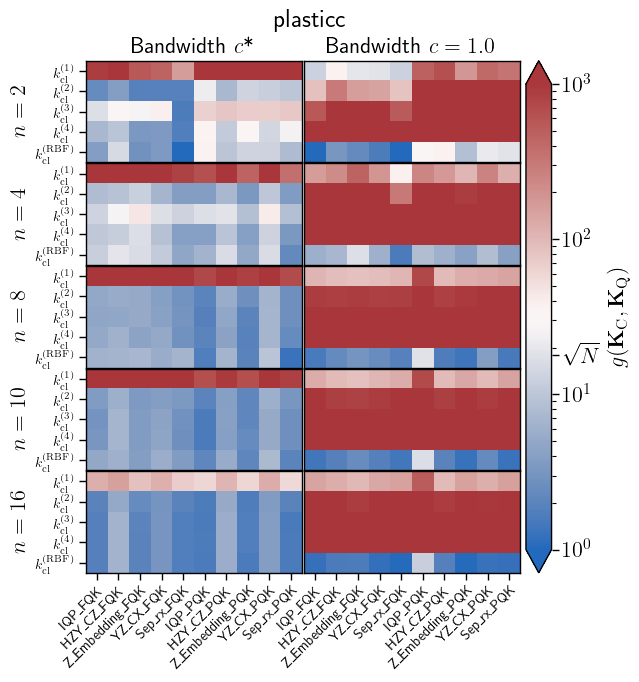

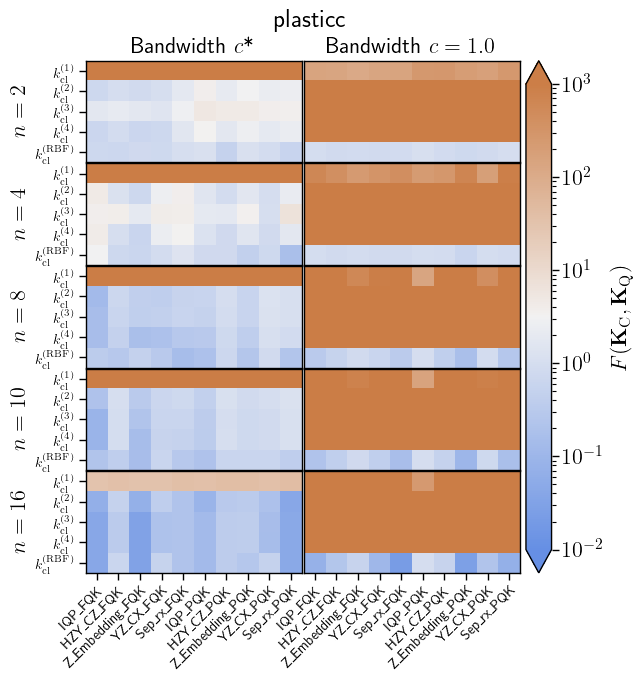

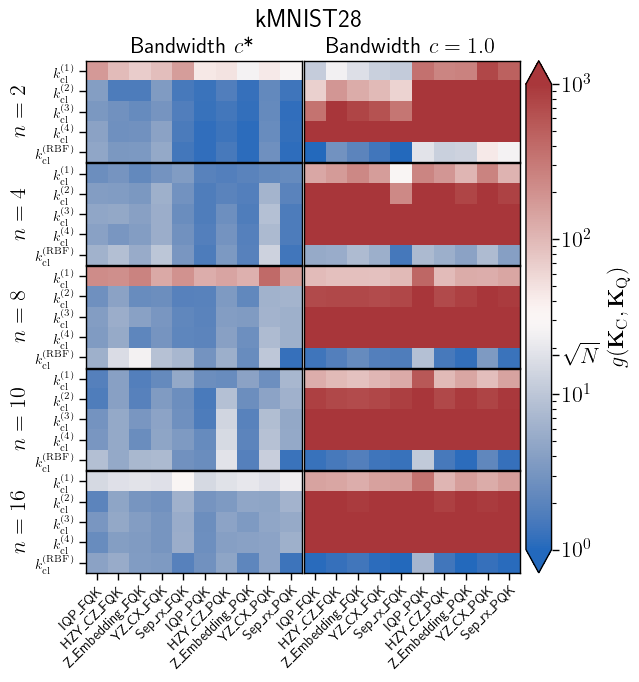

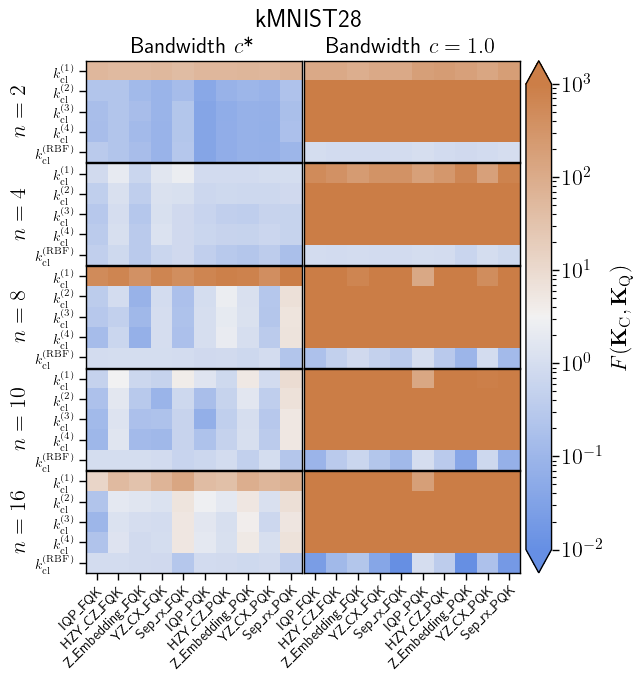

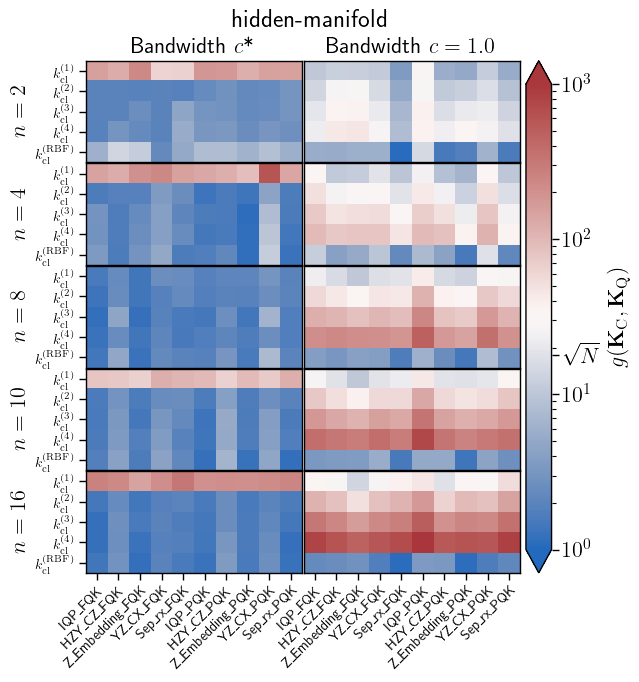

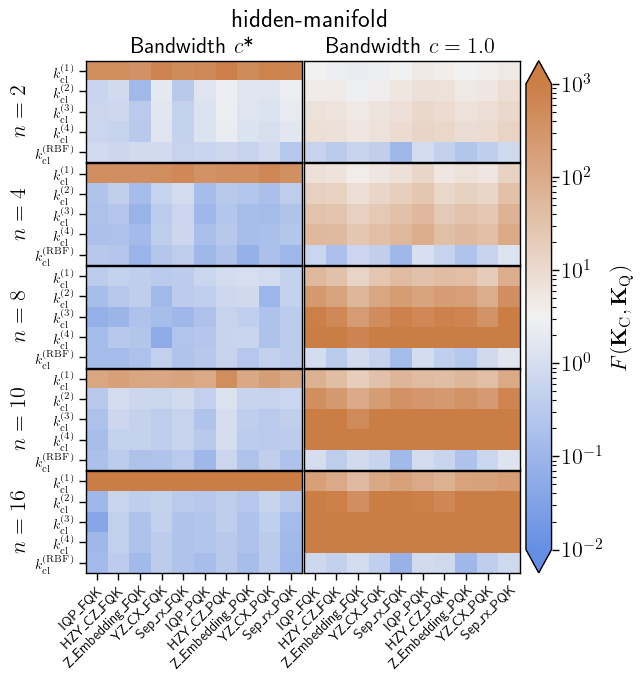

In [12]:
classical_kernels = ['rbf_poly_1', 'rbf_poly_2',  'rbf_poly_3', 'rbf_poly_4', 'rbf']
classical_kernels_labels = [r'$k_{\mathrm{cl}}^{(1)}$', r'$k_{\mathrm{cl}}^{(2)}$',  r'$k_{\mathrm{cl}}^{(3)}$', r'$k_{\mathrm{cl}}^{(4)}$', r'$k_{\mathrm{cl}}^{(\mathrm{RBF})}$']
quantum_kernels= ['IQP_FQK', "HZY_CZ_FQK", "Z_Embedding_FQK", "YZ_CX_FQK", "Sep_rx_FQK", "IQP_PQK",  "HZY_CZ_PQK", "Z_Embedding_PQK",  "YZ_CX_PQK","Sep_rx_PQK" ]

sc = 0.7
figsize = (sc*12, sc*8)
figsize = (sc*8, sc*9.5)

#g_gen_train
#Frobenius Difference
distance_list = ["Frobenius Difference"]
distance_list = ["g_gen_train", "Frobenius Difference", ]


def format_scientific_notation(value):
    if value == 0:
        return "0"
    # Determine the exponent
    exponent = int(np.floor(np.log10(abs(value))))

    # Calculate the coefficient
    coefficient = value / (10 ** exponent)

    # Format the result
    return f"${coefficient:.1f}$" + r"$\times$"+ f"$10^{exponent}$"


#filter only dataset_name




def plot_heatmaps(dataset_name):
    df_simplified_mean_grouped_ds, df_simplified_median_grouped_ds = df_simplified_mean_grouped, df_simplified_median_grouped

    df_simplified_mean_grouped_ds = df_simplified_mean_grouped_ds[df_simplified_mean_grouped_ds["dataset_name"] == dataset_name]
    df_simplified_median_grouped_ds = df_simplified_median_grouped_ds[df_simplified_median_grouped_ds["dataset_name"] == dataset_name]

    for i, distance in enumerate(distance_list):
        if distance == "g_gen_train":
            vmin = 1
            vmax = np.min([df_simplified_median_grouped_ds["g_gen_train"].max(), 10**3])    
            cmap = sns.color_palette('vlag', as_cmap=True)
        elif distance == "Frobenius Difference":
            vmin = 10**-2
            vmax = 10**3#df_simplified_median_grouped_ds["Frobenius Difference"].max()
            cmap = sns.diverging_palette(255, 35, l=60, as_cmap=True)


        df_alignments_geo_with_seeds, df_alignments_geo_averaged, df_alignments_geo_median = df_simplified_mean_grouped_ds, df_simplified_mean_grouped_ds, df_simplified_median_grouped_ds

        df_alignments_agg = df_alignments_geo_median
        df_alignments_agg_without = df_alignments_agg.drop(columns=["seed", "dataset_name", "num_qubits", "optimal c"])
        #vmin=df_alignments_agg_without.values.min(), vmax=df_alignments_agg_without.values.max()
        
        #norm = LogNorm(vmin=10**-3, vmax=10**3)

        # plot
        # dataset_0 with num_qubits_0 and bandwidth_0 dataset_0 with num_qubits_0 and bandwidth_1
        # dataset_0 with num_qubits_1 and bandwidth_0 dataset_0 with num_qubits_1 and bandwidth_1
        # dataset_1 with num_qubits_0 and bandwidth_0 dataset_1 with num_qubits_0 and bandwidth_1
        # dataset_1 with num_qubits_1 and bandwidth_0 dataset_1 with num_qubits_1 and bandwidth_1


        #filter out dataset, num_qubits, bandwidth plot heatmap
        num_rows = len(df_alignments_agg["num_qubits"].unique())
        fig, axs = plt.subplots(num_rows, 2, 
                                figsize=figsize,
                                gridspec_kw={'width_ratios': [1, 1]})

        for d, dataset_ in enumerate(df_alignments_agg["dataset_name"].unique()):
            df_alignments_agg_dataset = df_alignments_agg[df_alignments_agg["dataset_name"] == dataset_]
            df_alignments_agg_dataset_without = df_alignments_agg_dataset.drop(columns=["seed", "dataset_name", "num_qubits", "optimal c"])
            
            norm = LogNorm(vmin=vmin, vmax=vmax)

            for n, num_qubits_ in enumerate(df_alignments_agg["num_qubits"].unique()):
                for b, optimal_c_status in enumerate([True, False]):
                    df_temp = df_alignments_agg[(df_alignments_agg["dataset_name"] == dataset_) & (df_alignments_agg["num_qubits"] == num_qubits_) & (df_alignments_agg["optimal c"] == optimal_c_status)].copy()
                    alignments = np.zeros((len(classical_kernels), len(quantum_kernels)))
                    print(f"dataset: {dataset_}, num_qubits: {num_qubits_}, optimal_c: {optimal_c_status}")
                    for i, classical_name in enumerate(classical_kernels):
                        for j, quantum_name in enumerate(quantum_kernels):
                            print(f"classical: {classical_name}, quantum: {quantum_name}")
                            df_temp_classical_v_quantum = df_temp[(df_temp["classical_kernel_name"] == classical_name) & (df_temp["quantum_kernel_name"] == quantum_name)]
                            #print(df_temp_classical_v_quantum.iloc[0])  
                            try:
                                value = df_temp_classical_v_quantum[distance].values[0]
                            except:
                                value = np.nan
                            alignments[i, j] = value

                    title = f"{dataset_}"


                    if d == 0:
                        column_index = b 
                    if d == 1:
                        column_index = b + 3
                    
                    ax = axs[n, column_index]
                    #upper_mask = np.triu(np.ones_like(alignments, dtype=bool), k=1)
                    

                    pos = ax.imshow(alignments, cmap=cmap, norm=norm, aspect = "auto")
                    #pos = sns.heatmap(alignments, ax=ax, cmap=cmap, norm=norm, annot=True)
                    #use sns heatmap
                    #sns.heatmap(alignments, ax=ax, cmap=cmap, norm=norm, annot=False)


                    if  column_index != 0:
                        ax.set_yticks([])
                    if n != len(df_alignments_agg["num_qubits"].unique())-1:
                        ax.set_xticks([])

                    if column_index == 0:
                        ax.set_ylabel(f"$n = {num_qubits_}$")
                        ax.set_yticks(np.arange(len(classical_kernels)), labels=classical_kernels_labels, fontsize=10) 

                    if num_qubits_ == df_alignments_agg["num_qubits"].unique()[-1]:
                        ax.set_xticks(np.arange(len(quantum_kernels)), labels=quantum_kernels)
                        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)


                    if n == 0:
                        if optimal_c_status:
                            ax.set_title(f"Bandwidth $c$*")
                        elif not optimal_c_status:
                            high_c = np.round(df[(df["optimal c"] == False) ]["bandwidth"].iloc[0],3)
                            ax.set_title(f"Bandwidth $c={high_c}$")
                    elif n == 1:
                        ax.set_title(f"")
                    
                    #reduce distance between subplots
                    plt.subplots_adjust(hspace=0.01, wspace=0.01)
                    if n == 1 and column_index == 2*len(df_alignments_agg["dataset_name"].unique())-1:
                        #pass
                        colorbar = fig.colorbar(pos, ax=axs, norm=norm, label=label_dictionary[distance], anchor=(1.8, 0), pad=0.01, extend="both")
                    
                        if distance == "g_gen_train":
                            
                            colorbar.set_ticks([1, 10, 18, 100, vmax])
                            if vmax != 10**3:
                                vmax_str = format_scientific_notation(vmax)
                            else:
                                vmax_str = "$10^3$"

                            print(vmax_str)

                            colorbar.set_ticklabels(["$10^0$", "$10^1$",] +  [r"$\sqrt{N}$"] + ["$10^2$", f"{vmax_str}"])
                        
                    for i in range(len(classical_kernels)):
                        for j in range(len(quantum_kernels)):
                            pass
                            #text = ax.text(j, i, f"{alignments[i, j]:.1e}",
                            #    ha="center", va="center", color="black")
                            
        dataset_list = df_alignments_agg["dataset_name"].unique()
        #decode bytes to string
        dataset_list = [dataset for dataset in dataset_list]
        if dataset_list[0] == "pennylane_hidden-manifold":
            dataset_list[0] = "hidden-manifold"
        plt.figtext(0.525,0.94,f"{dataset_list[0]}", va="center", ha="center", size=18)
        plt.savefig(f"../data/plots/global_plots/general_{dataset_name}_{distance}_gramm_matrix_sc.pdf", dpi=400,  bbox_inches = 'tight')

print("plasticc")
plot_heatmaps("plasticc")
print("kMNIST28")
plot_heatmaps("kMNIST28")
print("hidden-manifold")
plot_heatmaps("pennylane_hidden-manifold")


